# Gradient Descent 2D

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image
import pywt
import pywt.data
from utils_wavelet import *
import scipy.stats as stats
from scipy import misc

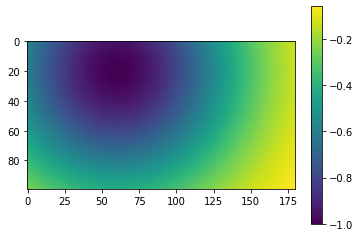

In [2]:
(sx,sy) = (180,100)

x=np.arange(sx)
y=np.arange(sy)
[xx,yy]=np.meshgrid(x,y)

(mu_x,mu_y) = (60,20)
sig = 60
mesh = -np.exp(-((xx-mu_x)**2+(yy-mu_y)**2)/(2*sig**2))

plt.figure()
plt.imshow(mesh)
plt.colorbar()
plt.show()

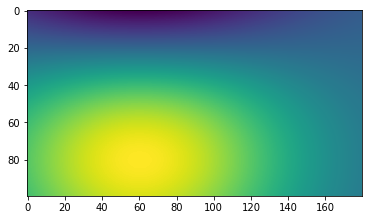

In [3]:
(gy,gx) = np.gradient(mesh)
g = gy+gx
plt.figure()
plt.imshow(gy)
plt.show()

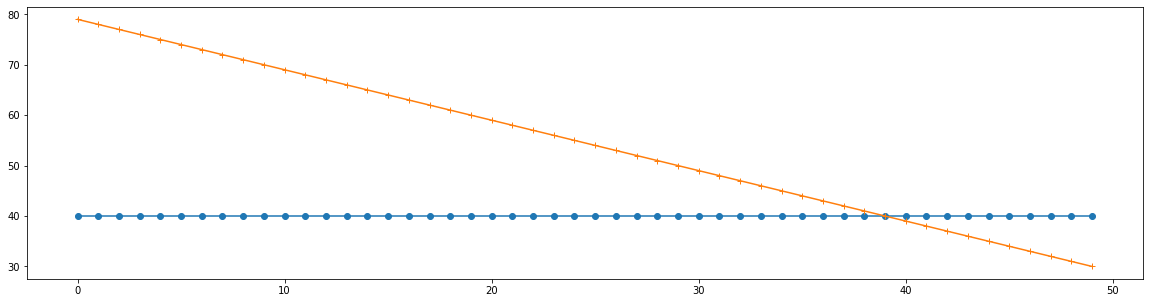

In [4]:
(yk,xk) = (80,40)
# gk = 1000
ak = 100

leng = 50
xk_array = np.zeros(leng)
yk_array = np.zeros(leng)
for i in range(leng):
    xk = int(xk - ak*gx[yk,xk])
    yk = int(yk - ak*gy[yk,xk])
    # gk = g[xk]
    xk_array[i] = xk
    yk_array[i] = yk


plt.figure(figsize=(20,5))
plt.plot(xk_array,'o-')
plt.plot(yk_array,'+-')
plt.show()

In [5]:
(yk,xk) = (20,10)

ak*gy[yk,xk]

0.0

In [6]:
xk = 10

## V2

Function

In [7]:
def fonction(x1,x2):
    return - 1.0 * math.exp(-x1**2 - x2**2)

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)


Plot function

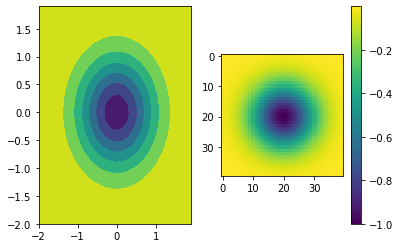

In [11]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)

xx1,xx2 = np.meshgrid(x1,x2)

z = - 1.0 * np.exp(-xx1**2 - xx2**2)

plt.figure()
plt.subplot(1,2,1)
plt.contourf(x1,x2,z)
plt.subplot(1,2,2)
plt.imshow(z)
plt.colorbar()
plt.show()

GD

0.9922451584331851 1.4883677376515123 0.0019965988202887003
0.9841542313323145 1.476231347000033 0.0021749024122583033
0.9757011910735821 1.4635517866122814 0.0023756594601382283
0.9668571684235951 1.4502857526388622 0.002602502453102104
0.9575900607860779 1.4363850911822393 0.0028597775959505814
0.9478640773611926 1.4217961160456052 0.0031527082540723783
0.9376392103414557 1.4064588155163467 0.0034876004526735727
0.9268706195491158 1.3903059293297448 0.003872102085675372
0.9155079162444643 1.3732618743758902 0.00431553073172742
0.9034943302170936 1.3552414953383036 0.004829288994349992
0.8907657432416912 1.3361486148769348 0.005427391035746215
0.8772495720351233 1.3158743580702055 0.006127129297499534
0.8628634862229275 1.2942952293557282 0.006949915548732366
0.8475139533087724 1.2712709299893528 0.007922333734396783
0.8310946165269025 1.2466419248200173 0.009077439979765872
0.8134845379551411 1.220226806963069 0.010456330208778189
0.7945463870590438 1.1918195806223926 0.0121099539467

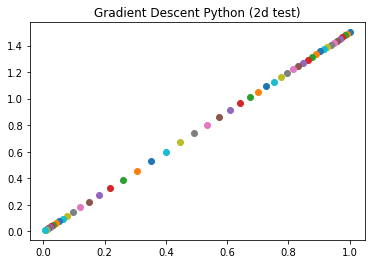

In [12]:
alpha = 0.1 # learning rate
nb_max_iter = 100 # Nb max d'iteration
eps = 0.0001 # stop condition

x1_0 = 1.0 # start point
x2_0 = 1.5 
z0 = fonction(x1_0,x2_0)
plt.scatter(x1_0,x2_0)

cond = eps + 10.0 # start with cond greater than eps (assumption)
nb_iter = 0 
tmp_z0 = z0
while cond > eps and nb_iter < nb_max_iter:
    tmp_x1_0 = x1_0 - alpha * partial_derivative(fonction, 0, [x1_0,x2_0])
    tmp_x2_0 = x2_0 - alpha * partial_derivative(fonction, 1, [x1_0,x2_0])
    x1_0 = tmp_x1_0
    x2_0 = tmp_x2_0
    z0 = fonction(x1_0,x2_0)
    nb_iter = nb_iter + 1
    cond = abs( tmp_z0 - z0 )
    tmp_z0 = z0
    # print (x1_0,x2_0,cond)
    plt.scatter(x1_0, x2_0)

plt.title("Gradient Descent Python (2d test)")
plt.show()